In [1]:
import networkx as nx
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
recipes_info_df = pd.read_csv('out/recipes_info.csv')

In [4]:
count_recipes_by_year_sr = recipes_info_df.groupby('year')['title'].count()

In [5]:
sum_ingr_combs_by_year = pd.read_csv('out/ingr_combs.csv')
sum_ingr_combs_by_year.set_index('year', inplace=True)

In [6]:
perc_ingr_combs_by_year = sum_ingr_combs_by_year.apply(
    lambda x: round(100 * x / count_recipes_by_year_sr[x.index], 2),
    axis=0,
)

In [7]:
sum_tech_combs_by_year = pd.read_csv('out/tech_combs.csv')
sum_tech_combs_by_year.set_index('year', inplace=True)
for c in sum_tech_combs_by_year:
    if 't_agua' in eval(c) or 't_sal' in eval(c):
        sum_tech_combs_by_year = sum_tech_combs_by_year.drop(c, axis=1)

In [8]:
perc_tech_combs_by_year = sum_tech_combs_by_year.apply(
    lambda x: round(100 * x / count_recipes_by_year_sr[x.index], 2),
    axis=0,
)

In [9]:
sum_ingr_tech_combs_by_year = pd.read_csv('out/ingr_tech_combs.csv')
sum_ingr_tech_combs_by_year.set_index('year', inplace=True)
for c in sum_ingr_tech_combs_by_year:
    if eval(c)[1] in ['t_agua', 't_sal']:
        sum_ingr_tech_combs_by_year = sum_ingr_tech_combs_by_year.drop(c, axis=1)

In [10]:
perc_ingr_tech_combs_by_year = sum_ingr_tech_combs_by_year.apply(
    lambda x: round(100 * x / count_recipes_by_year_sr[x.index], 2),
    axis=0,
)

In [26]:
def max_by_year(df):
    r = {}
    for i, x in df.iterrows():
        r[i] = (x.idxmax(), x.max())
    return r

def top_(df, top):
    m = max_by_year(df)
    s = sorted(m.values(), key=lambda x: x[1])
    r = list(set(x for x, y in s))[:top]
    return r

In [46]:
max_ingrs = top_(perc_ingr_combs_by_year, 5)[1:]

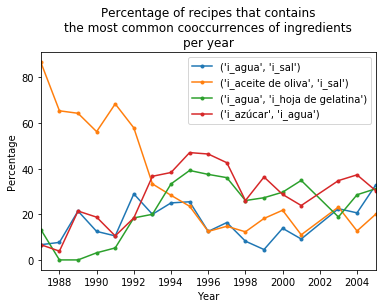

In [47]:
ax = perc_ingr_combs_by_year[max_ingrs].plot(
    figsize=(6, 4),
    title = 'Percentage of recipes that contains\nthe most common cooccurrences of ingredients\nper year',
    marker='.',
#     logy=True,
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
# ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [48]:
max_techs = top_(perc_tech_combs_by_year, 4)

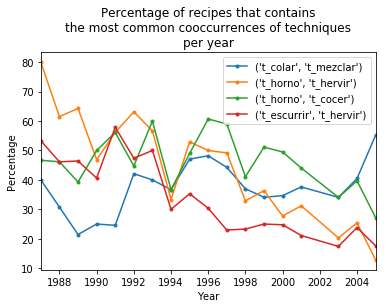

In [49]:
ax = perc_tech_combs_by_year[max_techs].plot(
    figsize=(6, 4),
    title = 'Percentage of recipes that contains\nthe most common cooccurrences of techniques\nper year',
    marker='.',
#     logy=True,
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
# ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [50]:
max_ingrs_techs = top_(perc_ingr_tech_combs_by_year, 4)

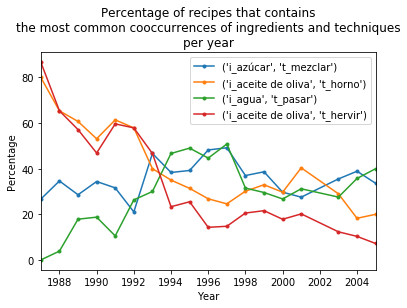

In [51]:
ax = perc_ingr_tech_combs_by_year[max_ingrs_techs].plot(
    figsize=(6, 4),
    title = 'Percentage of recipes that contains\nthe most common cooccurrences of ingredients and techniques\nper year',
    marker='.',
#     logy=True,
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage');
# ax.yaxis.set_major_locator(MaxNLocator(integer=True));

In [18]:
# g = nx.MultiGraph()
# for i, x in sum_ingr_combs_by_year.iterrows():
#     i = int(i)
#     for j, y in x.iteritems():
#         if y >= ???:
#             y = int(y)
#             a = eval(j)[0]
#             b = eval(j)[1]
#             if a not in g:
#                 g.add_node(a, weight=0)
#             if b not in g:
#                 g.add_node(b, weight=0)
#             g.node[a]['weight'] += 1
#             g.node[b]['weight'] += 1
#             g.add_edge(a, b, year=i, weight=y)

In [19]:
# g.number_of_nodes()

In [20]:
# g.number_of_edges()

In [21]:
# nx.write_gexf(g,'out/g.gexf')

In [22]:
# nx.draw(g)